# Red Neuronal desde código modular (src/train.py)


In [15]:
# Importar librerias
import sys
import os
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [16]:
# Ajustar ruta para importar desde src/
sys.path.append("../src")
import train

In [17]:
# Cargar configuración y datos
config = train.load_config()
X, y = train.load_data()
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

In [18]:
# Construir y entrenar el modelo
model = train.build_model(config, input_dim=X.shape[1])
history = train.train_model(model, X_train, y_train, config)

C:\Users\USS\anaconda3\envs\tf310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8709 - loss: 0.4801 - val_accuracy: 0.8888 - val_loss: 0.4002
Epoch 2/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8882 - loss: 0.3899 - val_accuracy: 0.8888 - val_loss: 0.3720
Epoch 3/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8864 - loss: 0.3700 - val_accuracy: 0.8888 - val_loss: 0.3667
Epoch 4/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8877 - loss: 0.3605 - val_accuracy: 0.8888 - val_loss: 0.3608
Epoch 5/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8881 - loss: 0.3558 - val_accuracy: 0.8888 - val_loss: 0.3589
Epoch 6/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8885 - loss: 0.3511 - val_accuracy: 0.8887 - val_loss: 0.3582
Epoch 7/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8850 - loss: 0.3580 - val_accuracy: 0.8888 - val_loss: 0.3555
Epoch 8/20
1990/1990 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8872 - loss: 0.3510 - 

In [19]:
# Evaluación
y_pred_proba = model.predict(X_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     17665
           1       0.58      0.01      0.01      2234

    accuracy                           0.89     19899
   macro avg       0.74      0.50      0.48     19899
weighted avg       0.85      0.89      0.84     19899

ROC AUC: 0.6274496048384828


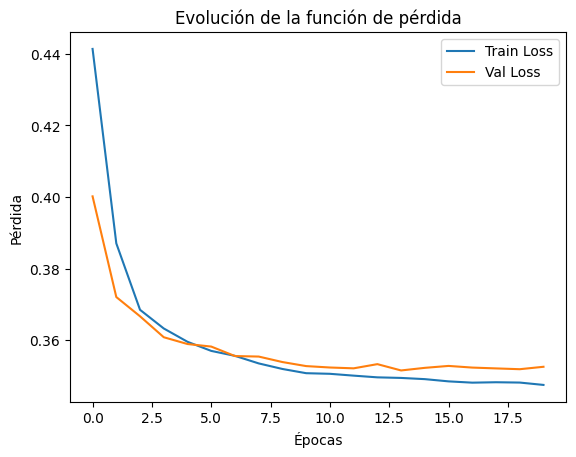

In [20]:
# Visualización de métricas
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Evolución de la función de pérdida")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()
plt.show()

In [21]:
# Al final de RedNeuronal.ipynb
model.save("../models/modelo_nn.keras")